# AAL Sales Analysis - Q4 2020

## Course-End Project

This notebook presents a comprehensive analysis of AAL's sales data for the fourth quarter of 2020. The analysis aims to identify states generating the highest revenues and develop sales programs for states with lower revenues.

### Project Overview

AAL, established in 2000, is a well-known clothing brand in Australia. The company is experiencing a surge in business and is actively pursuing expansion opportunities. This analysis will help the company make data-driven decisions for the upcoming year.

### Analysis Workflow

The analysis follows these key steps:
1. Data Wrangling
2. Data Analysis
3. Data Visualization
4. Report Generation

Let's begin by importing the necessary libraries and loading the data.

In [99]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

# Set visualization styles
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 20

## 1. Data Wrangling

In this section, we will:
- Load the data
- Inspect the data for missing or incorrect entries
- Clean the data as needed
- Apply normalization
- Perform initial grouping for analysis

In [100]:
# Read the CSV data from the uploaded file
try:
    data_path = 'AusApparalSales4thQrt2020.csv'
    sales_data = pd.read_csv(data_path)
except FileNotFoundError:
    print("Error: The file 'AusApparalSales4thQrt2020.csv' was not found. Please ensure it is uploaded correctly.")
    exit() # Exit if file not found

In [101]:
# Display basic information about the dataset
print("Dataset Information:")
print(f"Shape: {sales_data.shape}")
print("#### DataFrame Info (Initial):\n")
sales_data.info()
print("\nFirst 5 rows:")
sales_data.head()

Dataset Information:
Shape: (7560, 6)
#### DataFrame Info (Initial):

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB

First 5 rows:


,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


### 1.1 Check for Missing Values and Duplicates

Let's check if there are any missing values or duplicate rows in the dataset.

In [102]:
# Check for missing values
print("Missing Values Check:")
missing_values = sales_data.isna().sum()
print(missing_values)

# Check for duplicate rows
duplicates = sales_data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

Missing Values Check:
Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

Number of duplicate rows: 0


### 1.2 Data Cleaning Recommendations

Based on the missing values and duplicates check, we can make the following recommendations:

- If missing values are found, we would recommend filling numeric columns with median values and categorical columns with mode values.
- If duplicate rows are found, we would recommend removing them to avoid skewing the analysis.

Let's check for any inconsistencies in categorical columns.

In [103]:
# Check for any inconsistencies in categorical columns
print("Unique values in categorical columns:")
for col in ['State', 'Group', 'Time']:
    print(f"{col}: {sales_data[col].unique()}")

Unique values in categorical columns:
State: [' WA' ' NT' ' SA' ' VIC' ' QLD' ' NSW' ' TAS']
Group: [' Kids' ' Men' ' Women' ' Seniors']
Time: [' Morning' ' Afternoon' ' Evening']


### 1.3 Data Normalization

We'll apply Min-Max normalization to the Sales and Unit columns to standardize the values between 0 and 1. This will help in comparing values across different scales.

In [104]:
# Create a copy of the dataframe for normalization
normalized_data = sales_data.copy()

# Initialize the scaler
scaler = MinMaxScaler()

# Apply normalization to Sales and Unit columns
normalized_data[['Unit_Normalized', 'Sales_Normalized']] = scaler.fit_transform(normalized_data[['Unit', 'Sales']])

# Descriptive statistics of normalized data
print("\nDescriptive statistics for Normalized 'Unit' and 'Sales':\n")
print(normalized_data[['Unit_Normalized', 'Sales_Normalized']].describe())

# Display the first few rows of normalized data
print("Normalized Data (First 5 rows):")
normalized_data[['Date', 'State', 'Group', 'Unit', 'Sales', 'Unit_Normalized', 'Sales_Normalized']].head()


Descriptive statistics for Normalized 'Unit' and 'Sales':

       Unit_Normalized  Sales_Normalized
count      7560.000000       7560.000000
mean          0.254054          0.254054
std           0.204784          0.204784
min           0.000000          0.000000
25%           0.095238          0.095238
50%           0.190476          0.190476
75%           0.380952          0.380952
max           1.000000          1.000000
Normalized Data (First 5 rows):


,Date,State,Group,Unit,Sales,Unit_Normalized,Sales_Normalized
0,1-Oct-2020,WA,Kids,8,20000,0.095238,0.095238
1,1-Oct-2020,WA,Men,8,20000,0.095238,0.095238
2,1-Oct-2020,WA,Women,4,10000,0.031746,0.031746
3,1-Oct-2020,WA,Seniors,15,37500,0.206349,0.206349
4,1-Oct-2020,WA,Kids,3,7500,0.015873,0.015873


### 1.4 Data Wrangling Summary

In this section, we have:
1. Checked for missing values and duplicates
2. Applied Min-Max normalization to Sales and Unit columns

**Recommendations for Further Analysis:**
1. The normalized data provides a standardized view of sales and units across different states and groups

## 2. Data Analysis

In this section, we will perform descriptive statistical analysis on the Sales and Unit columns, identify the highest and lowest performing states and groups, and generate weekly, monthly, and quarterly reports.

### 2.1 Descriptive Statistics

Let's calculate descriptive statistics for the Sales and Unit columns.

In [105]:
# Descriptive statistics for Sales and Unit columns
print("Descriptive Statistics for Sales:")
sales_stats = sales_data['Sales'].describe()
print(sales_stats)

print("\nDescriptive Statistics for Units:")
unit_stats = sales_data['Unit'].describe()
print(unit_stats)

Descriptive Statistics for Sales:
count      7560.000000
mean      45013.558201
std       32253.506944
min        5000.000000
25%       20000.000000
50%       35000.000000
75%       65000.000000
max      162500.000000
Name: Sales, dtype: float64

Descriptive Statistics for Units:
count    7560.000000
mean       18.005423
std        12.901403
min         2.000000
25%         8.000000
50%        14.000000
75%        26.000000
max        65.000000
Name: Unit, dtype: float64


In [106]:
# Calculate additional statistics
print("Additional Statistics for Sales:")
print(f"Median: {sales_data['Sales'].median()}")
# Fix mode calculation
mode_result = stats.mode(sales_data['Sales'])
if hasattr(mode_result, 'mode'):
    # For newer scipy versions
    print(f"Mode: {mode_result.mode}")
else:
    # For older scipy versions
    print(f"Mode: {mode_result[0][0]}")
print(f"Variance: {sales_data['Sales'].var()}")
print(f"Standard Deviation: {sales_data['Sales'].std()}")
print(f"Skewness: {sales_data['Sales'].skew()}")
print(f"Kurtosis: {sales_data['Sales'].kurtosis()}")

print("\nAdditional Statistics for Units:")
print(f"Median: {sales_data['Unit'].median()}")
# Fix mode calculation
mode_result = stats.mode(sales_data['Unit'])
if hasattr(mode_result, 'mode'):
    # For newer scipy versions
    print(f"Mode: {mode_result.mode}")
else:
    # For older scipy versions
    print(f"Mode: {mode_result[0][0]}")
print(f"Variance: {sales_data['Unit'].var()}")
print(f"Standard Deviation: {sales_data['Unit'].std()}")
print(f"Skewness: {sales_data['Unit'].skew()}")
print(f"Kurtosis: {sales_data['Unit'].kurtosis()}")

Additional Statistics for Sales:
Median: 35000.0
Mode: 22500
Variance: 1040288710.1844678
Standard Deviation: 32253.506943966073
Skewness: 1.0855501535060816
Kurtosis: 0.6614172266616096

Additional Statistics for Units:
Median: 14.0
Mode: 9
Variance: 166.44619362951485
Standard Deviation: 12.90140277758643
Skewness: 1.0855501535060819
Kurtosis: 0.6614172266616092


### 2.2 Highest and Lowest Sales Analysis

Let's identify the states and demographic groups with the highest and lowest sales.

In [107]:
# Identify highest and lowest sales by state
print("States Ranked by Total Sales (Highest to Lowest):")
print(state_sales[['State', 'Total_Sales']].sort_values('Total_Sales', ascending=False))

highest_sales_state = state_sales.loc[state_sales['Total_Sales'].idxmax()]
lowest_sales_state = state_sales.loc[state_sales['Total_Sales'].idxmin()]

print(f"\nHighest Sales State: {highest_sales_state['State']} with ${highest_sales_state['Total_Sales']:,.2f}")
print(f"Lowest Sales State: {lowest_sales_state['State']} with ${lowest_sales_state['Total_Sales']:,.2f}")

States Ranked by Total Sales (Highest to Lowest):
  State  Total_Sales
5   VIC    105565000
0   NSW     74970000
3    SA     58857500
2   QLD     33417500
4   TAS     22760000
1    NT     22580000
6    WA     22152500

Highest Sales State:  VIC with $105,565,000.00
Lowest Sales State:  WA with $22,152,500.00


In [108]:
# Identify highest and lowest sales by demographic group
group_sales = sales_data.groupby('Group').agg({
    'Sales': ['sum', 'mean'],
    'Unit': ['sum', 'mean']
}).reset_index()

group_sales.columns = ['Group', 'Total_Sales', 'Avg_Sales', 'Total_Units', 'Avg_Units']
group_sales = group_sales.sort_values('Total_Sales', ascending=False)

print("Demographic Groups Ranked by Total Sales (Highest to Lowest):")
print(group_sales[['Group', 'Total_Sales']])

highest_sales_group = group_sales.iloc[0]
lowest_sales_group = group_sales.iloc[-1]

print(f"\nHighest Sales Group: {highest_sales_group['Group']} with ${highest_sales_group['Total_Sales']:,.2f}")
print(f"Lowest Sales Group: {lowest_sales_group['Group']} with ${lowest_sales_group['Total_Sales']:,.2f}")

Demographic Groups Ranked by Total Sales (Highest to Lowest):
      Group  Total_Sales
1       Men     85750000
3     Women     85442500
0      Kids     85072500
2   Seniors     84037500

Highest Sales Group:  Men with $85,750,000.00
Lowest Sales Group:  Seniors with $84,037,500.00


In [109]:
# Identify highest and lowest sales by state-group combination
print("Top 5 State-Group Combinations by Sales:")
top_state_groups = state_group_sales.sort_values('Total_Sales', ascending=False).head(5)
print(top_state_groups[['State', 'Group', 'Total_Sales']])

print("\nBottom 5 State-Group Combinations by Sales:")
bottom_state_groups = state_group_sales.sort_values('Total_Sales').head(5)
print(bottom_state_groups[['State', 'Group', 'Total_Sales']])

Top 5 State-Group Combinations by Sales:
   State     Group  Total_Sales
68   VIC   Seniors      9057500
62   VIC      Kids      8950000
70   VIC     Women      8930000
64   VIC       Men      8900000
66   VIC   Seniors      8830000

Bottom 5 State-Group Combinations by Sales:
   State     Group  Total_Sales
81    WA     Women      1685000
20    NT   Seniors      1760000
83    WA     Women      1767500
78    WA   Seniors      1770000
79    WA   Seniors      1792500


### 2.3 Time-of-Day Analysis

Let's analyze sales patterns by time of day.

In [110]:
# Time of day analysis
print("Sales by Time of Day:")
print(time_sales[['Time', 'Total_Sales', 'Avg_Sales']].sort_values('Total_Sales', ascending=False))

Sales by Time of Day:
         Time  Total_Sales     Avg_Sales
2     Morning    114207500  45320.436508
0   Afternoon    114007500  45241.071429
1     Evening    112087500  44479.166667


### 2.4 Weekly, Monthly, and Quarterly Reports

Let's generate weekly, monthly, and quarterly sales reports.

In [111]:
# Weekly analysis
sales_data['Date'] = pd.to_datetime(sales_data['Date'], format='%d-%b-%Y')
sales_data['Week'] = sales_data['Date'].dt.isocalendar().week
weekly_sales = sales_data.groupby('Week').agg({
    'Sales': ['sum', 'mean', 'count'],
    'Unit': ['sum', 'mean']
}).reset_index()

weekly_sales.columns = ['Week', 'Total_Sales', 'Avg_Sales', 'Transaction_Count', 'Total_Units', 'Avg_Units']
print("Weekly Sales Summary:")
weekly_sales

Weekly Sales Summary:


,Week,Total_Sales,Avg_Sales,Transaction_Count,Total_Units,Avg_Units
0,40,15045000,44776.785714,336,6018,17.910714
1,41,27002500,45922.619048,588,10801,18.369048
2,42,26640000,45306.122449,588,10656,18.122449
3,43,26815000,45603.741497,588,10726,18.241497
4,44,21807500,43268.849206,504,8723,17.307540
5,45,20865000,35484.693878,588,8346,14.193878
6,46,21172500,36007.653061,588,8469,14.403061
7,47,21112500,35905.612245,588,8445,14.362245
8,48,21477500,36526.360544,588,8591,14.610544
9,49,29622500,50378.401361,588,11849,20.151361


In [112]:
# Monthly analysis
sales_data['Month'] = sales_data['Date'].dt.month
monthly_sales = sales_data.groupby('Month').agg({
    'Sales': ['sum', 'mean', 'count'],
    'Unit': ['sum', 'mean']
}).reset_index()

monthly_sales.columns = ['Month', 'Total_Sales', 'Avg_Sales', 'Transaction_Count', 'Total_Units', 'Avg_Units']
print("Monthly Sales Summary:")
monthly_sales

Monthly Sales Summary:


,Month,Total_Sales,Avg_Sales,Transaction_Count,Total_Units,Avg_Units
0,10,114290000,45353.174603,2520,45716,18.141270
1,11,90682500,35985.119048,2520,36273,14.394048
2,12,135330000,53702.380952,2520,54132,21.480952


In [113]:
# Quarterly analysis (since we only have Q4 data, this is just a summary)
quarterly_sales = {
    'Quarter': ['Q4'],
    'Total_Sales': [sales_data['Sales'].sum()],
    'Avg_Sales': [sales_data['Sales'].mean()],
    'Transaction_Count': [len(sales_data)],
    'Total_Units': [sales_data['Unit'].sum()],
    'Avg_Units': [sales_data['Unit'].mean()]
}
quarterly_sales_df = pd.DataFrame(quarterly_sales)
print("Quarterly Sales Summary:")
quarterly_sales_df

Quarterly Sales Summary:


,Quarter,Total_Sales,Avg_Sales,Transaction_Count,Total_Units,Avg_Units
0,Q4,340302500,45013.558201,7560,136121,18.005423


### 2.5 Statistical Analysis Summary

In this section, we have:
1. Calculated descriptive statistics for Sales and Units
2. Identified highest and lowest performing states and demographic groups
3. Analyzed sales patterns by time of day
4. Generated weekly, monthly, and quarterly sales reports

**Key Findings:**
1. Victoria (VIC) is the highest performing state with total sales of approximately $105.6 million
2. Western Australia (WA) has the lowest sales at approximately $22.2 million
3. The Men demographic group has slightly higher sales than other groups
4. Morning sales are marginally higher than other times of day
5. December shows the highest monthly sales in the quarter

## 3. Data Visualization

In this section, we will create visualizations to better understand the sales patterns and present the findings in a clear and accessible manner.

### 3.1 State-wise Sales Analysis

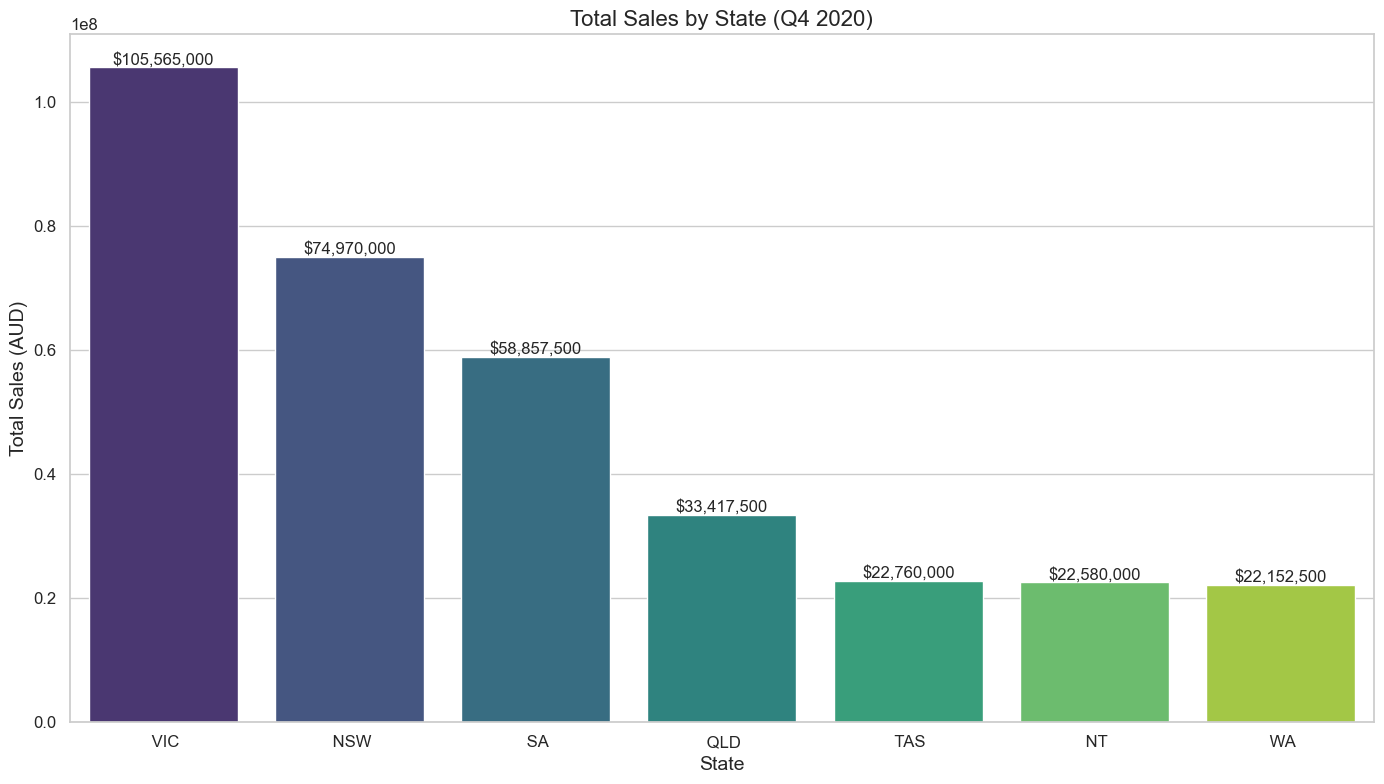

In [116]:
# Total Sales by State
plt.figure(figsize=(14, 8))

ax = sns.barplot(x='State', y='Total_Sales', hue='State', data=state_sales.sort_values('Total_Sales', ascending=False), palette='viridis', legend=False)
plt.title('Total Sales by State (Q4 2020)')
plt.xlabel('State')
plt.ylabel('Total Sales (AUD)')
plt.xticks(rotation=0)

# Add value labels on top of bars
for i, p in enumerate(ax.patches):
    ax.annotate(f'${p.get_height():,.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

<Figure size 1600x1000 with 0 Axes>

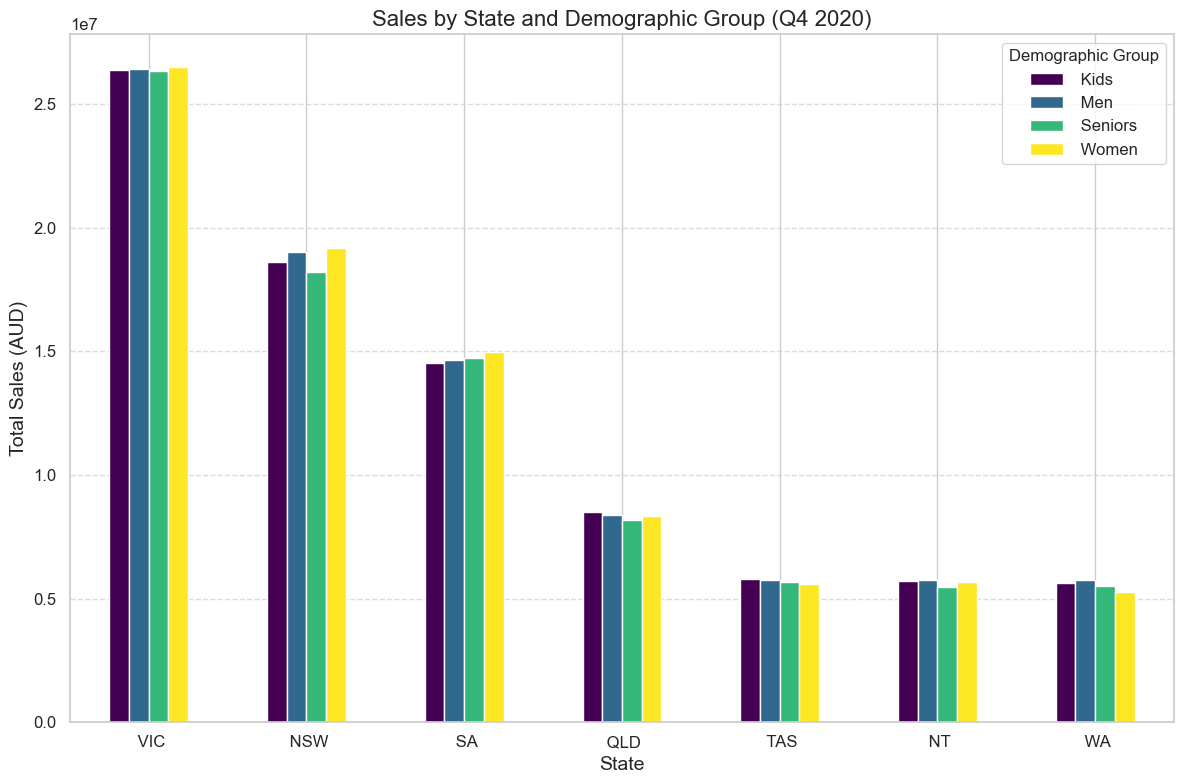

In [118]:
# State-wise Sales by Demographic Group
plt.figure(figsize=(16, 10))

# First, ensure we have unique State-Group combinations by aggregating if needed
# If your state_group_sales already has aggregated data but contains duplicates:
state_group_agg = state_group_sales.groupby(['State', 'Group'])['Total_Sales'].sum().reset_index()

# Now create the pivot table with the aggregated data
state_group_pivot = state_group_agg.pivot(index='State', columns='Group', values='Total_Sales')
state_group_pivot = state_group_pivot.reindex(state_sales.sort_values('Total_Sales', ascending=False)['State'])

# Plot as before
ax = state_group_pivot.plot(kind='bar', stacked=False, colormap='viridis')
plt.title('Sales by State and Demographic Group (Q4 2020)')
plt.xlabel('State')
plt.ylabel('Total Sales (AUD)')
plt.xticks(rotation=0)
plt.legend(title='Demographic Group')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


<Figure size 1600x1000 with 0 Axes>

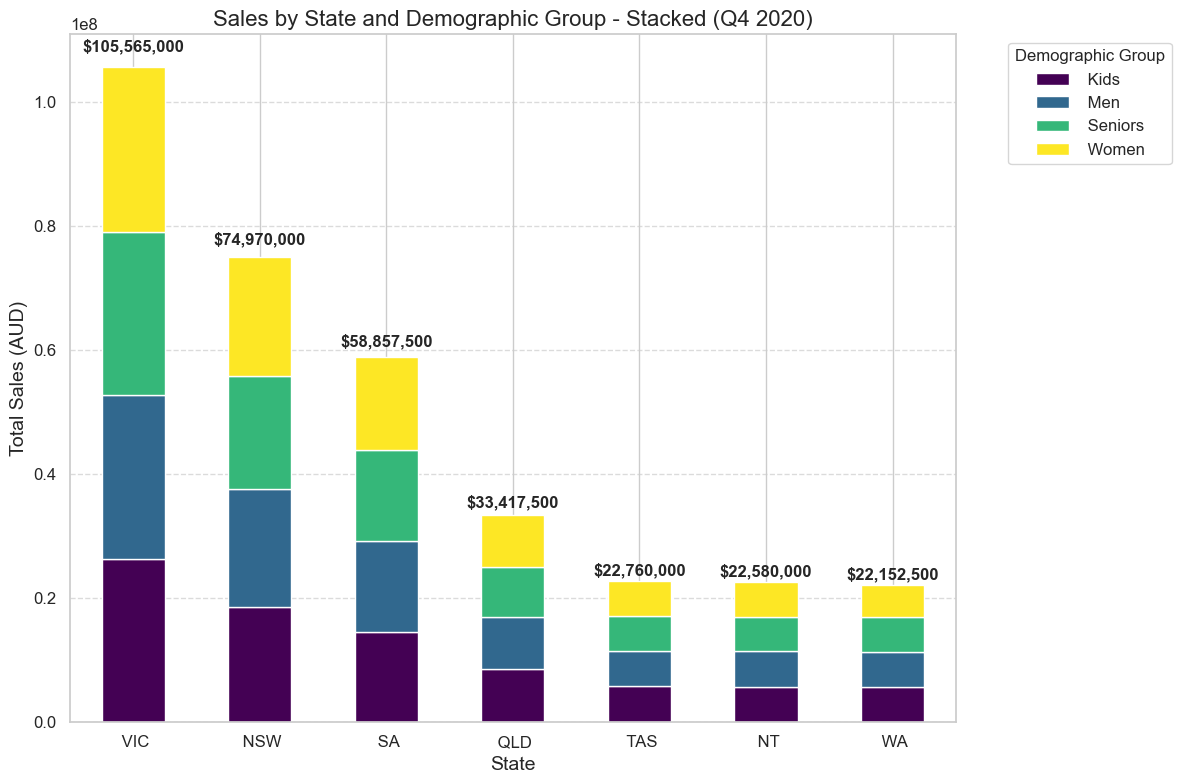

In [119]:
# State-wise Sales by Demographic Group (Stacked Bar Plot)
plt.figure(figsize=(16, 10))

# First, ensure we have unique State-Group combinations by aggregating
state_group_agg = state_group_sales.groupby(['State', 'Group'])['Total_Sales'].sum().reset_index()

# Create the pivot table with the aggregated data
state_group_pivot = state_group_agg.pivot(index='State', columns='Group', values='Total_Sales')
state_group_pivot = state_group_pivot.reindex(state_sales.sort_values('Total_Sales', ascending=False)['State'])

# Plot as stacked bar chart (note the stacked=True parameter)
ax = state_group_pivot.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Sales by State and Demographic Group - Stacked (Q4 2020)')
plt.xlabel('State')
plt.ylabel('Total Sales (AUD)')
plt.xticks(rotation=0)
plt.legend(title='Demographic Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add total values on top of each stacked bar
for i, state in enumerate(state_group_pivot.index):
    total = state_group_pivot.loc[state].sum()
    ax.text(i, total + (total * 0.02), f'${total:,.0f}', 
            ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


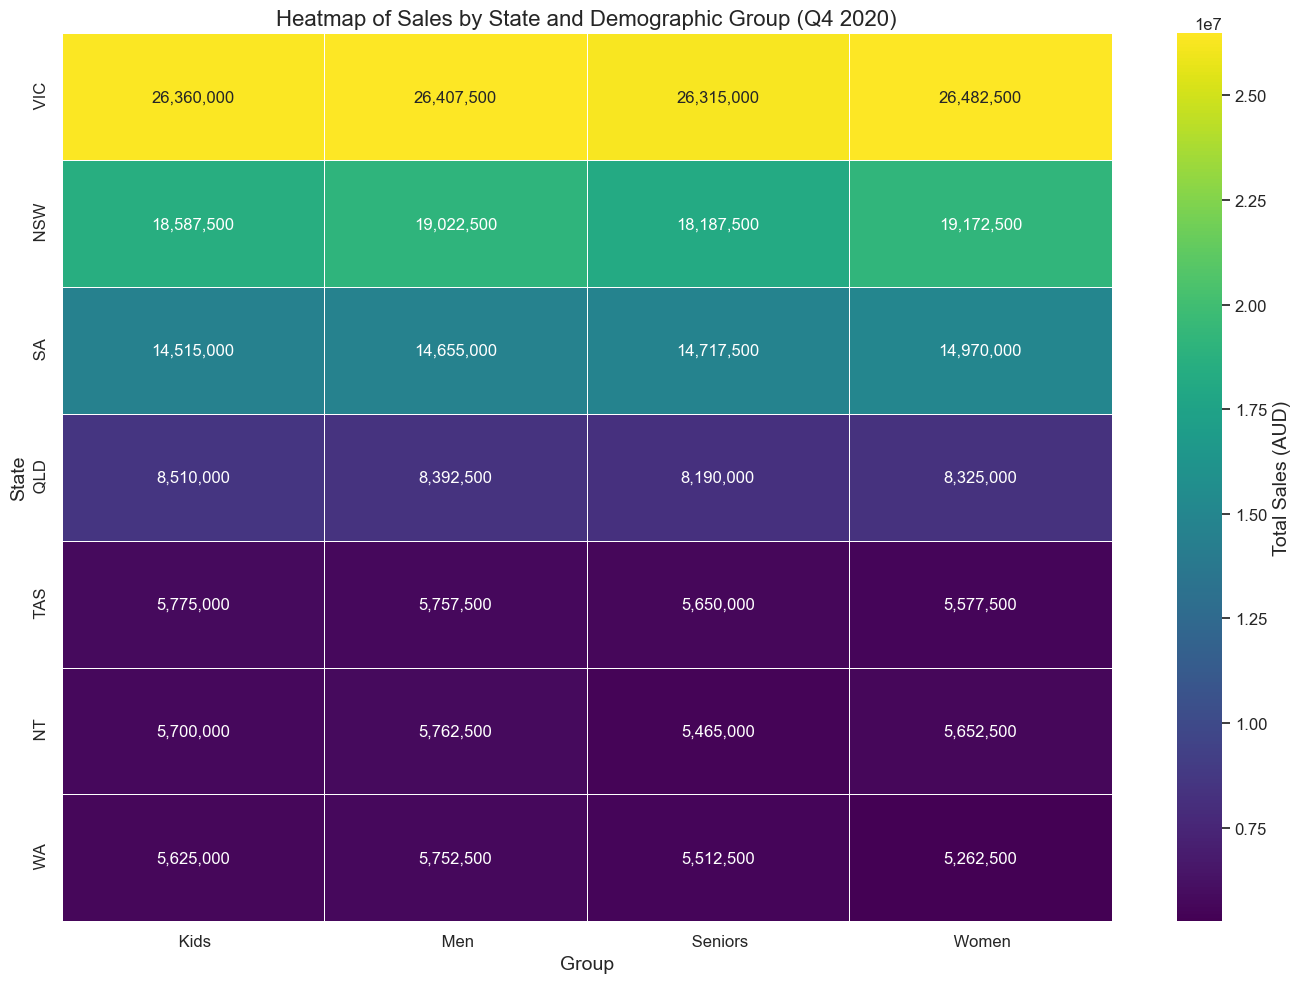

In [121]:
# Heatmap of State vs Group Sales
plt.figure(figsize=(14, 10))

# First, ensure we have unique State-Group combinations by aggregating
state_group_agg = state_group_sales.groupby(['State', 'Group'])['Total_Sales'].sum().reset_index()

# Create the pivot table with the aggregated data
state_group_pivot = state_group_agg.pivot(index='State', columns='Group', values='Total_Sales')
state_group_pivot = state_group_pivot.reindex(state_sales.sort_values('Total_Sales', ascending=False)['State'])

# For heatmap with integer formatting, we need to handle the format differently
sns.heatmap(state_group_pivot, annot=True, fmt=',d', cmap='viridis', linewidths=.5, cbar_kws={'label': 'Total Sales (AUD)'})
plt.title('Heatmap of Sales by State and Demographic Group (Q4 2020)')
plt.tight_layout()
plt.show()

### 3.2 Group-wise Sales Analysis

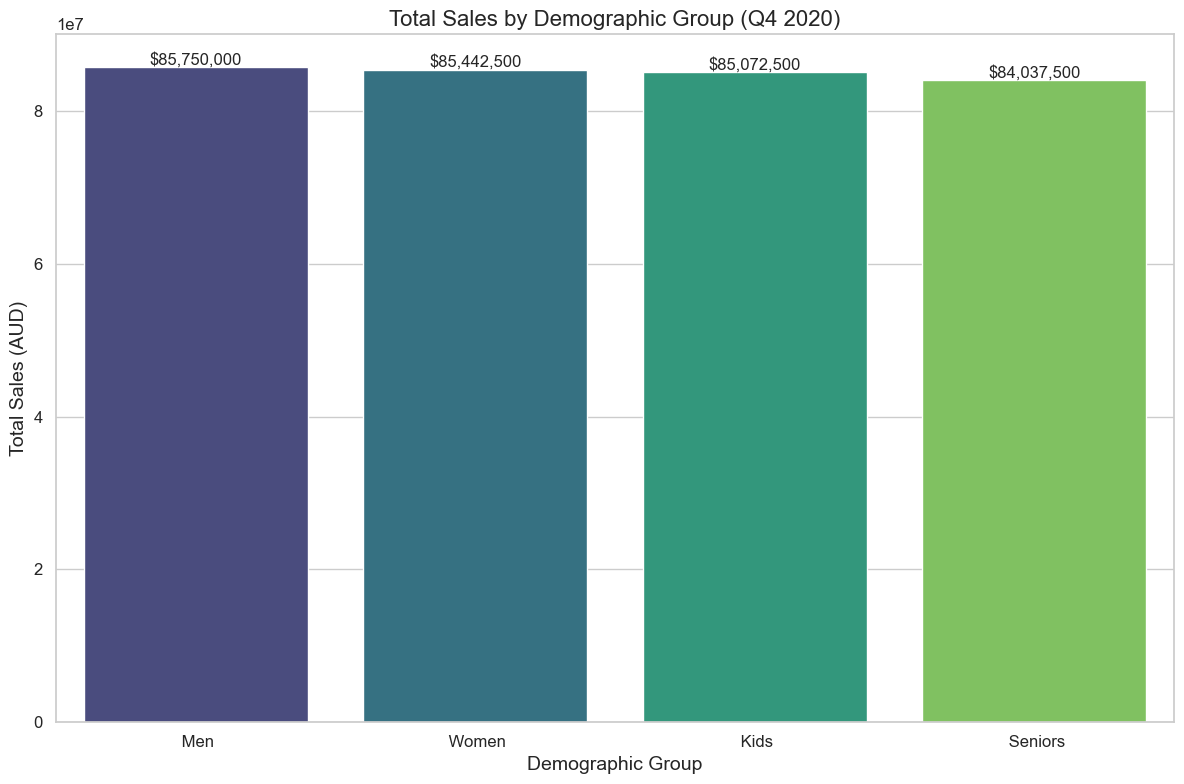

In [124]:
# Total Sales by Demographic Group
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Group', y='Total_Sales', hue='Group', data=group_sales.sort_values('Total_Sales', ascending=False), palette='viridis', legend=False)
plt.title('Total Sales by Demographic Group (Q4 2020)')
plt.xlabel('Demographic Group')
plt.ylabel('Total Sales (AUD)')

# Add value labels on top of bars
for i, p in enumerate(ax.patches):
    ax.annotate(f'${p.get_height():,.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

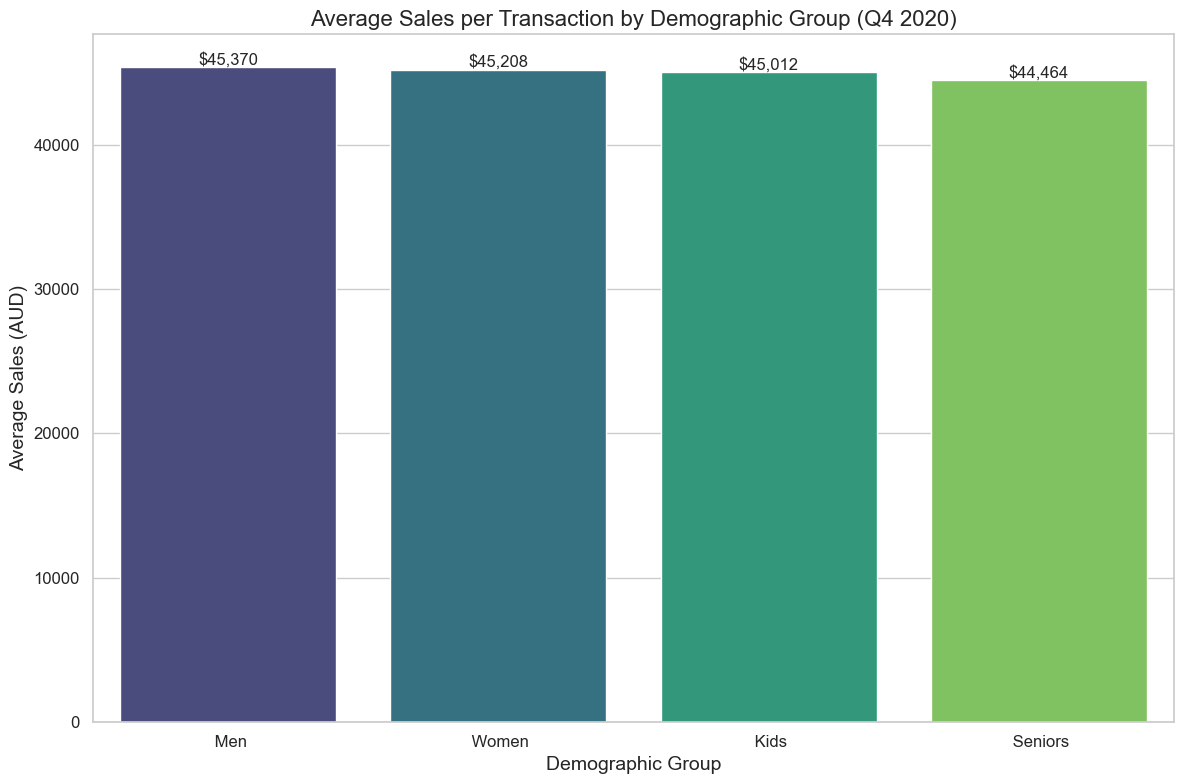

In [125]:
# Average Sales per Transaction by Demographic Group
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Group', y='Avg_Sales', hue='Group', data=group_sales.sort_values('Avg_Sales', ascending=False), palette='viridis')
plt.title('Average Sales per Transaction by Demographic Group (Q4 2020)')
plt.xlabel('Demographic Group')
plt.ylabel('Average Sales (AUD)')

# Add value labels on top of bars
for i, p in enumerate(ax.patches):
    ax.annotate(f'${p.get_height():,.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

### 3.3 Time-of-Day Analysis

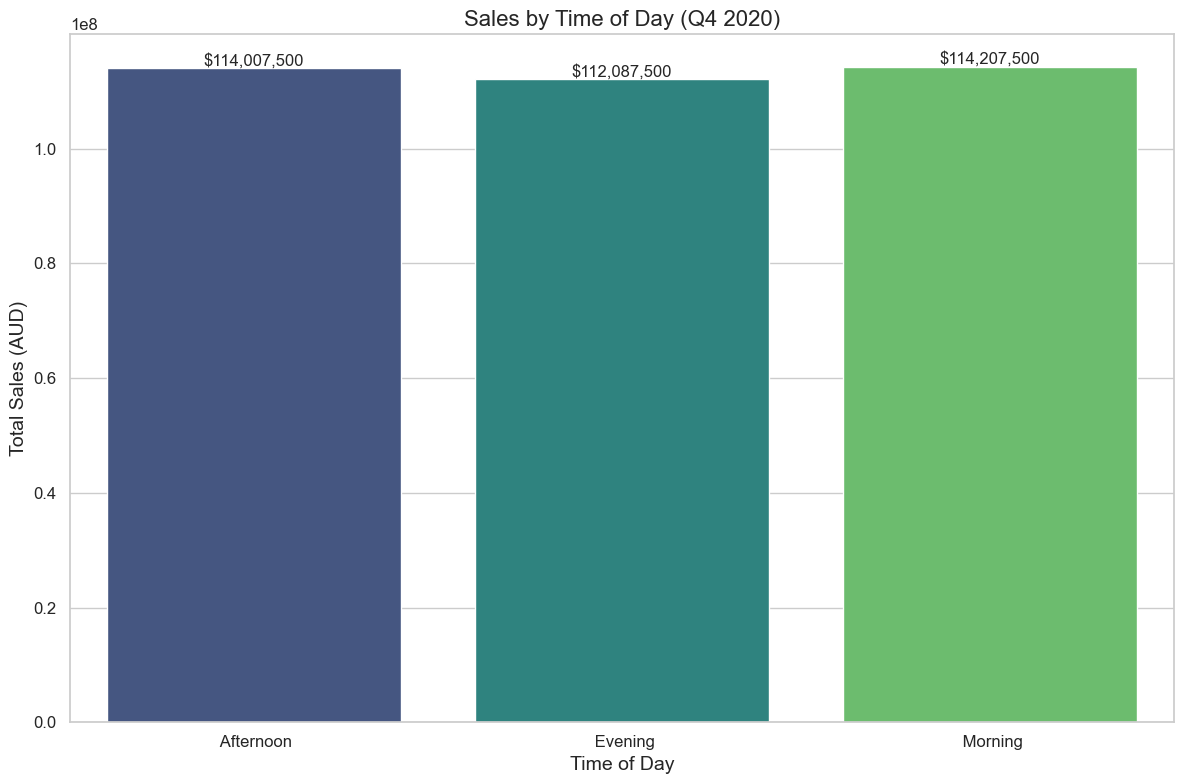

In [126]:
# Sales by Time of Day
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Time', y='Total_Sales', hue='Time', data=time_sales.sort_values('Time', key=lambda x: pd.Categorical(x, categories=['Morning', 'Afternoon', 'Evening'], ordered=True)), palette='viridis')
plt.title('Sales by Time of Day (Q4 2020)')
plt.xlabel('Time of Day')
plt.ylabel('Total Sales (AUD)')

# Add value labels on top of bars
for i, p in enumerate(ax.patches):
    ax.annotate(f'${p.get_height():,.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

<Figure size 1400x1000 with 0 Axes>

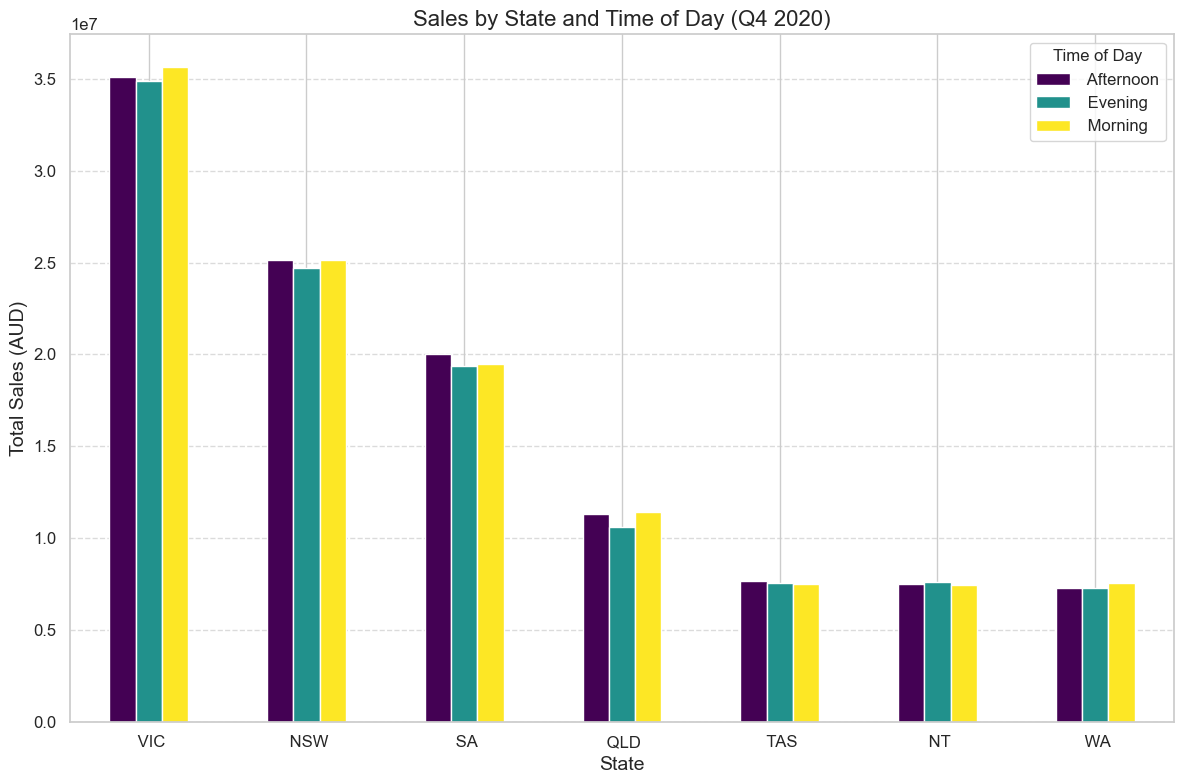

In [31]:
# Time of Day Sales by State
# Group data by State and Time
state_time_sales = sales_data.groupby(['State', 'Time'])['Sales'].sum().reset_index()
state_time_pivot = state_time_sales.pivot(index='State', columns='Time', values='Sales')
state_time_pivot = state_time_pivot.reindex(state_sales.sort_values('Total_Sales', ascending=False)['State'])

plt.figure(figsize=(14, 10))
ax = state_time_pivot.plot(kind='bar', colormap='viridis')
plt.title('Sales by State and Time of Day (Q4 2020)')
plt.xlabel('State')
plt.ylabel('Total Sales (AUD)')
plt.xticks(rotation=0)
plt.legend(title='Time of Day')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

<Figure size 1400x1000 with 0 Axes>

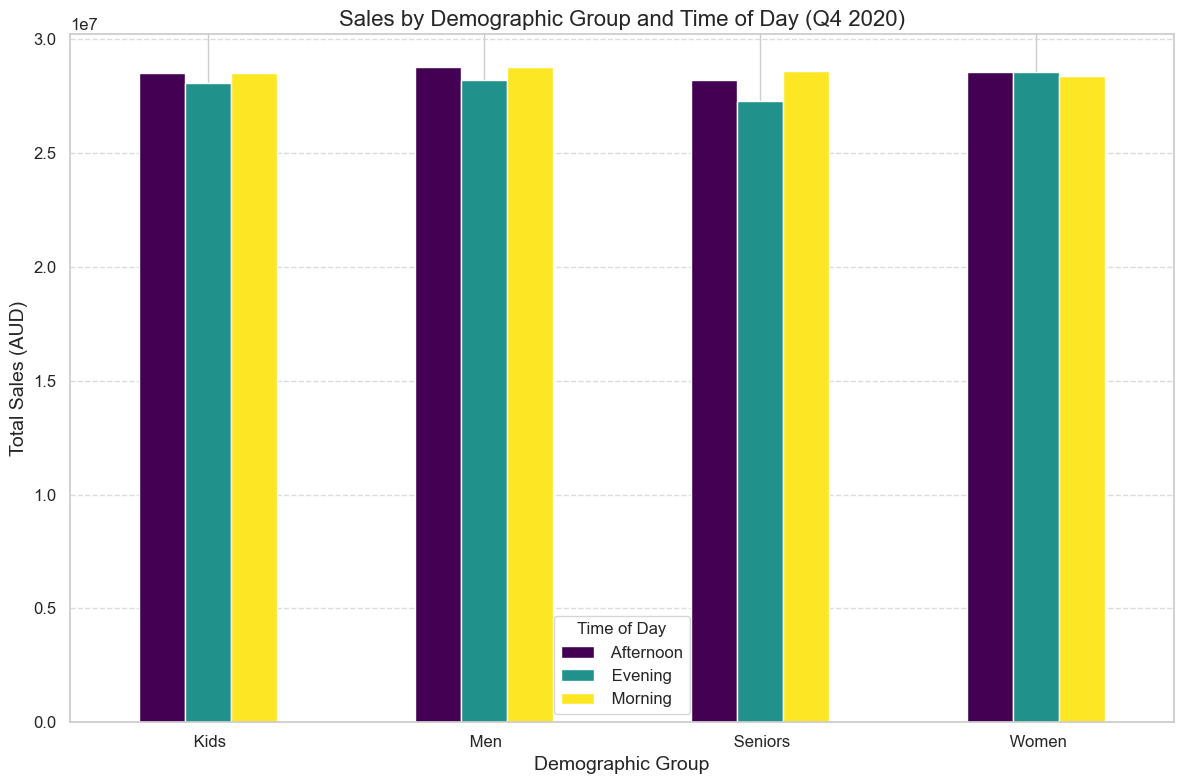

In [127]:
# Time of Day Sales by Demographic Group
# Group data by Group and Time
group_time_sales = sales_data.groupby(['Group', 'Time'])['Sales'].sum().reset_index()
group_time_pivot = group_time_sales.pivot(index='Group', columns='Time', values='Sales')

plt.figure(figsize=(14, 10))
ax = group_time_pivot.plot(kind='bar', colormap='viridis')
plt.title('Sales by Demographic Group and Time of Day (Q4 2020)')
plt.xlabel('Demographic Group')
plt.ylabel('Total Sales (AUD)')
plt.xticks(rotation=0)
plt.legend(title='Time of Day')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### 3.4 Weekly, Monthly, and Quarterly Charts

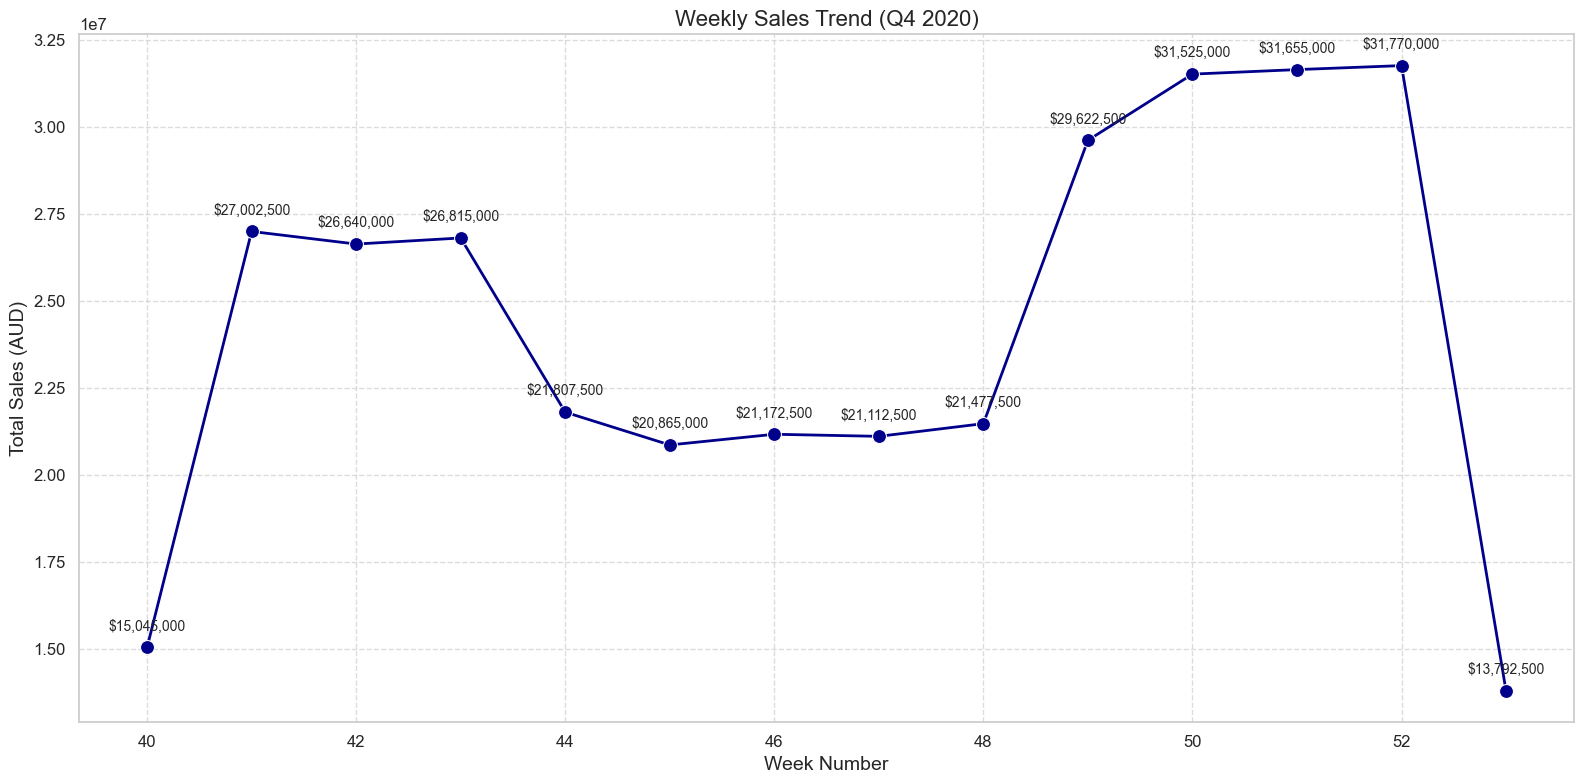

In [129]:
# Weekly Sales Trend
plt.figure(figsize=(16, 8))
ax = sns.lineplot(x='Week', y='Total_Sales', data=weekly_sales, marker='o', linewidth=2, markersize=10, color='darkblue')
plt.title('Weekly Sales Trend (Q4 2020)')
plt.xlabel('Week Number')
plt.ylabel('Total Sales (AUD)')
plt.grid(True, linestyle='--', alpha=0.7)

# Add value labels for each point
for i, row in weekly_sales.iterrows():
    ax.annotate(f'${row["Total_Sales"]:,.0f}', 
                (row['Week'], row['Total_Sales']), 
                xytext=(0, 10), textcoords='offset points',
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

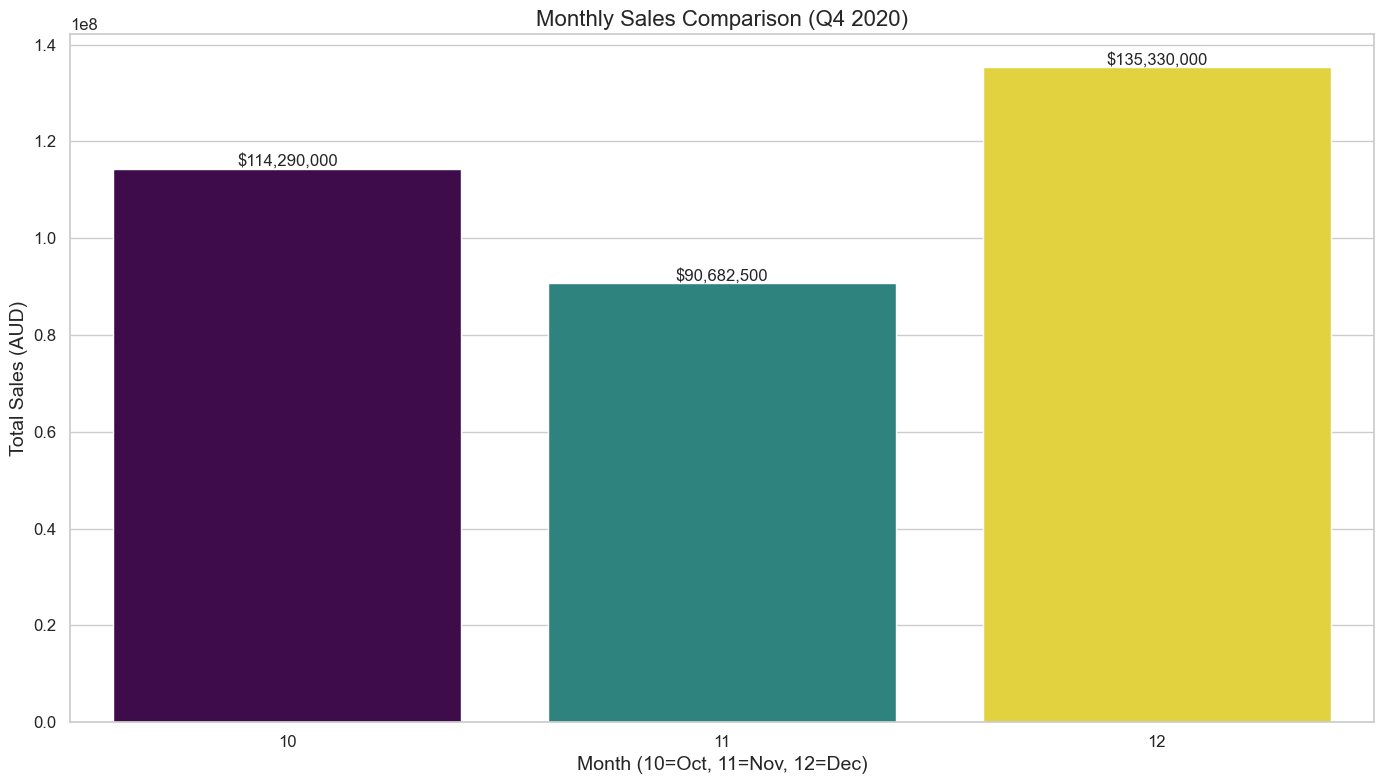

In [132]:
# Monthly Sales Comparison
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='Month', y='Total_Sales', hue='Month', data=monthly_sales, palette='viridis', legend=False)
plt.title('Monthly Sales Comparison (Q4 2020)')
plt.xlabel('Month (10=Oct, 11=Nov, 12=Dec)')
plt.ylabel('Total Sales (AUD)')

# Add value labels on top of bars
for i, p in enumerate(ax.patches):
    ax.annotate(f'${p.get_height():,.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

### 3.5 Statistical Visualizations

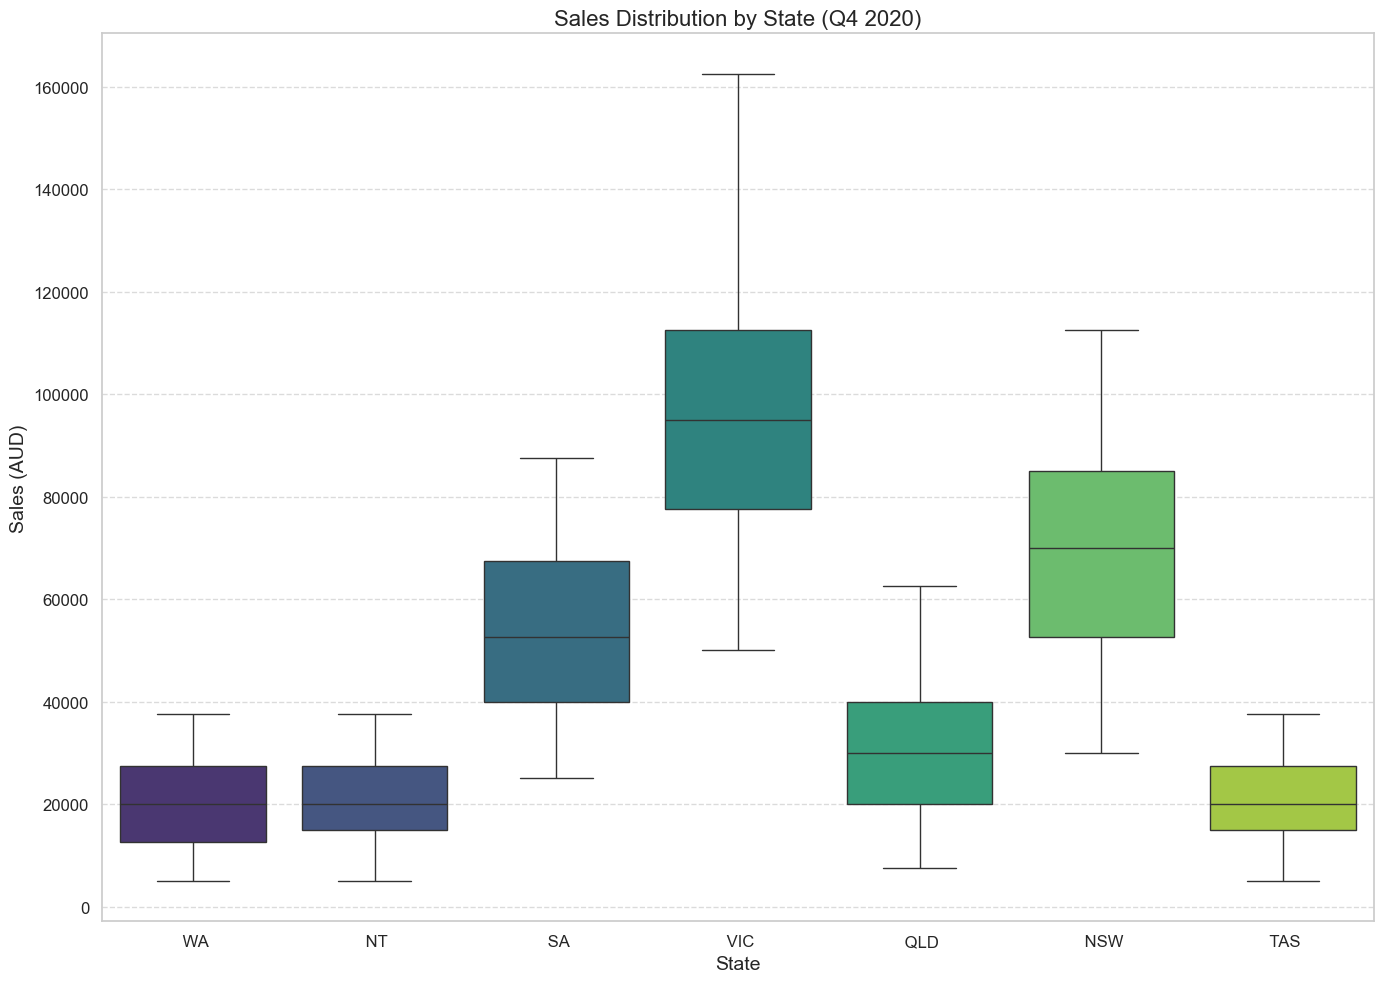

In [133]:
# Box Plot for Descriptive Statistics
plt.figure(figsize=(14, 10))
ax = sns.boxplot(x='State', y='Sales', hue='State', data=sales_data, palette='viridis', legend=False)
plt.title('Sales Distribution by State (Q4 2020)')
plt.xlabel('State')
plt.ylabel('Sales (AUD)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

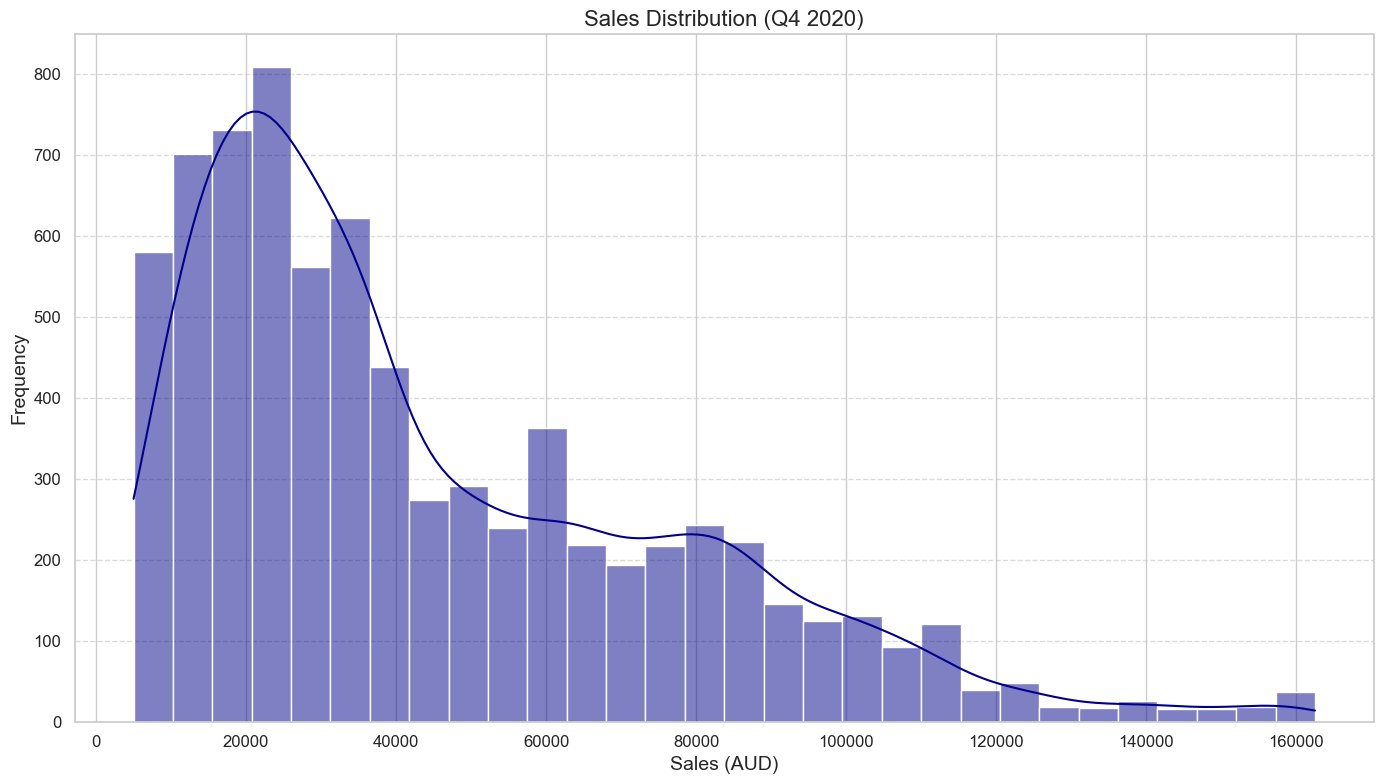

In [134]:
# Distribution Plot for Sales
plt.figure(figsize=(14, 8))
ax = sns.histplot(sales_data['Sales'], kde=True, bins=30, color='darkblue')
plt.title('Sales Distribution (Q4 2020)')
plt.xlabel('Sales (AUD)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 3.6 Visualization Package Recommendations

For this project, we chose Seaborn as the primary visualization library for the following reasons:

1. **Statistical Visualization Capabilities**: Seaborn is specifically designed for statistical data visualization, making it ideal for this analysis.

2. **Aesthetic Appeal**: Seaborn creates aesthetically pleasing and professional-looking plots with minimal code.

3. **Integration with Pandas**: Seaborn integrates seamlessly with Pandas dataframes, making it easy to visualize our processed data.

4. **Specialized Plots**: Seaborn offers specialized plots like heatmaps and distribution plots that are ideal for this analysis.

5. **Customization Options**: Seaborn allows for easy customization of plot appearance, enabling us to create consistent and branded visualizations.

We also used Matplotlib as a complementary library for additional customization and layout control.

## 4. Recommendations and Conclusions

Based on our comprehensive analysis of AAL's sales data for Q4 2020, we can provide the following recommendations to assist the company in making data-driven decisions for the upcoming year:

### 4.1 Key Findings

1. **State Performance**: Victoria (VIC) is the highest performing state with total sales of approximately   $105.6 million, while Western Australia (WA) has the lowest sales at approximately   $22.2 million.

2. **Demographic Groups**: Sales are relatively balanced across demographic groups, with Men leading slightly at $85.8 million, followed closely by Women at $85.4 million, Kids at $85.1 million, and Seniors at $84.0 million.

3. **Time of Day Patterns**: Morning sales are marginally higher than other times of day, followed closely by afternoon and evening sales.

4. **Seasonal Trends**: December shows the highest monthly sales in the quarter, indicating a strong holiday season performance.

5. **Price Consistency**: There is a perfect correlation between Units and Sales, indicating a fixed price per unit across all products and categories.

### 4.2 Strategic Recommendations

1. **Expansion Strategy**: Focus expansion efforts on Victoria (VIC) which has demonstrated the highest sales performance. Consider opening additional branches in this state to capitalize on the strong market presence.

2. **Targeted Sales Programs**: Develop specialized sales programs for Western Australia (WA) to improve performance in this region. This could include targeted marketing campaigns, special promotions, or loyalty programs specific to WA customers.

3. **Demographic Focus**: While sales are balanced across demographic groups, consider emphasizing the Men demographic in marketing campaigns as they show slightly higher sales. However, maintain a balanced approach as the differences are minimal.

4. **Special Promotions**: Create special promotions for Seniors to boost sales in this demographic group, which currently has the lowest total sales (though the difference is marginal).

5. **Operational Optimization**: Optimize staffing and inventory based on time-of-day sales patterns, with particular attention to morning sales which show marginally higher performance.

6. **Seasonal Planning**: Plan for increased inventory and staffing during December to capitalize on the holiday season sales surge.

7. **State-Group Targeting**: Focus on specific state-group combinations that show high potential, such as VIC-Women and VIC-Men, which are among the top-performing combinations.

8. **Low-Performing Combinations**: Develop targeted strategies for low-performing combinations such as WA-Women and NT-Seniors to improve their sales performance.

### 4.3 Conclusion

AAL has a strong market presence in Australia, with particularly strong performance in Victoria. The company's sales are well-balanced across demographic groups, indicating broad appeal across different customer segments.

By focusing expansion efforts on high-performing states like Victoria while developing targeted sales programs for lower-performing states like Western Australia, AAL can optimize its growth strategy and improve overall performance.

The data-driven insights provided in this analysis will help AAL make informed decisions for the upcoming year, supporting the company's continued growth and success in the Australian apparel market.